# History

### Königsberg Problem

We cannot have more than 2 nodes with an uneven number of edges for a graph to be walked through once on every edges. This means that the Königsberg Problem is not solvable.

### Network notation

Unweighted network (every link is the same none is stronger than the other)
Undirected ( if two nodes are connected they are connected to each other A to B and B to A)

#### Edgelist

                           ----------
                     Node Name - Node Name
                            15 - 20
                            52 - 63
                              ....
                              
                           ----------
                           
#### Matrix 

(1 if connected 0 if not)  

                                    C D
                                  A 1 0
                                  B 0 1

## Chapter 1 - Reading 

   Network                    Node         Links
   
   Metabolic Network          Molecules    Chemical Reactions
   WWW                        Documents    URLs
   Facebook                   Persons      Friendship
   
I'm particularly intersted in : 

The Nodes are :
Its quite large
Can it be mapped out ?

Because I think its cool

Maybe try and apply network science to trafic and commuting ? Because I feel like we still have big issue currently handling human flows and I think that applying Network science to it might help smooth out the traffic and movement of people inside big citie. 



## Chapter 2 - Reading 

Sparse Networks are networks where L << Lmax where Lmax is the maximum number of links in the graph. That means that a sparse Network is a network in which there are way less link that there could be, so the nodes are more isolated than they could be.

So when storing Networks or Matrix we should only store the existing links as they are way less than non exising ones.

A network where each nodes has many connection could be like the Network of employees relationship. They should all communicate with each other, but then only a few people actually have a lot of connection (Human Resources for examples) where as others only are communicating inside there section.

# Part 2: Exercices using NetworkX

## Königsberg Problem

So for an icon to be drawn without raising the hand we cannot have more than 2 nodes  with an uneven number of edges.

A degrees [(1, 3), (2, 2), (3, 3), (4, 2)]
B degrees [(1, 3), (2, 3), (3, 3), (4, 3)]
C degrees [(1, 4), (2, 2), (3, 4), (4, 2), (5, 4), (6, 2), (7, 4), (8, 2), (9, 4), (10, 2), (11, 4), (12, 2)]
D degrees [(1, 3), (2, 4), (3, 2), (4, 1), (5, 6), (6, 6), (7, 2), (8, 2), (9, 2), (10, 2)]


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


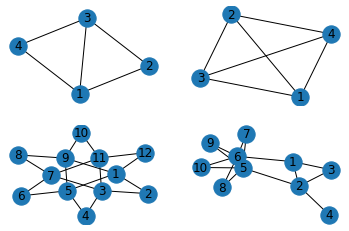

In [90]:
import networkx as nx
import matplotlib.pyplot as plt

# Icon A

A = nx.Graph()
A.add_nodes_from([1,2,3,4])
A.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4)])
print("A degrees " + str(A.degree()))

plt.subplot(221)
nx.draw(A, with_labels=True)

# Icon B

B = nx.Graph()
B.add_nodes_from(A)
B.add_edges_from(A.edges)
B.add_edge(4,2)
print("B degrees " + str(B.degree()))

plt.subplot(222)
nx.draw(B, with_labels=True)

# Icon C

C = nx.Graph()
C.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12])
C.add_edges_from([(1,2),(2,3),(3,4),(4,5),
                  (5,6),(6,7),(7,8),(8,9),
                  (9,10),(10,11),(11,12),(12,1),
                 (1,5),(5,9),(9,1),(11,3),(3,7),(7,11)])
print("C degrees " + str(C.degree()))

plt.subplot(223)
nx.draw(C, with_labels=True)


# Icon D

D = nx.Graph()
D.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
D.add_edges_from([(1,2),(2,3),(3,1),(2,4),
                  (2,5),(5,6),(6,1),(5,7),
                  (5,8),(7,6),(8,6),(5,9),
                 (5,10),(6,9),(6,10)])
print("D degrees " + str(D.degree()))

plt.subplot(224)
nx.draw(D, with_labels=True)

<b> So only b cannot be drawn without lifting our hand </b>

## Graph Representation

#### A - Undirected Graph

In [91]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#### Graph A #####

A = nx.Graph()
A.add_nodes_from([1,2,3,4,5,6])
A.add_edges_from([(1,2),(1,3),(1,4),(1,6),(2,3),(2,4),(6,3)])

print("A - Adjacency Matrix")
print(nx.to_numpy_matrix(A))

print()

print("A - List of links")
print(list(A.edges))

print()

print("A - Average Clustering Coefficient")
print(nx.average_clustering(A))

print()

# Relabeling

mapping = {5:6,6:5}
A = nx.relabel_nodes(A ,mapping, copy=True)

print("A - Adjacency Matrix after switch")
print(nx.to_numpy_matrix(A))
print()

print("A - List of links after switch")
print(list(A.edges))
print()

# Relabeling

mapping = {6:5,5:6}
A = nx.relabel_nodes(A ,mapping, copy=True)

print("A - Path of length 3 from 1 to 3")
for path in nx.all_simple_paths(A, source=1, target=3, cutoff=3):
    print(path)

print("A - Degree")
print(list(A.degree))
print()

print("A - Clustering Coefficient")
print(list(A.degree))
print()

print("A - Components")
print(nx.number_connected_components(A))
print()

A - Adjacency Matrix
[[0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]

A - List of links
[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]

A - Average Clustering Coefficient
0.6388888888888888

A - Adjacency Matrix after switch
[[0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]

A - List of links after switch
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]

A - Path of length 3 from 1 to 3
[1, 2, 3]
[1, 3]
[1, 4, 2, 3]
[1, 6, 3]
A - Degree
[(1, 4), (2, 3), (3, 3), (4, 2), (5, 0), (6, 2)]

A - Clustering Coefficient
[(1, 4), (2, 3), (3, 3), (4, 2), (5, 0), (6, 2)]

A - Components
2



In [ ]:
Relabeling only influence the links and not the adjacency matrix

#### B - Directed Graph

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

B = nx.DiGraph()
B.add_nodes_from(A)
B.add_edges_from([(6,1),(6,3),(1,2),(2,3),(3,2),(2,4),(3,1)])

print("B - Adjacency Matrix")
print(nx.to_numpy_matrix(B))

print()

print("B - List of links")
print(list(B.edges))

print()

print("B - Average Clustering Coefficient")
print(nx.average_clustering(B))

print()

# Relabeling

mapping = {5:6,6:5}
A = nx.relabel_nodes(B ,mapping, copy=True)

print("B - Adjacency Matrix after switch")
print(nx.to_numpy_matrix(B))
print()

print("B - List of links after switch")
print(list(B.edges))
print()

# Relabeling

mapping = {6:5,5:6}
B = nx.relabel_nodes(B ,mapping, copy=True)

print("B - Path of length 3 from 1 to 3")
for path in nx.all_simple_paths(B, source=1, target=3, cutoff=3):
    print(path)
    
print()


print("B - Degree")
print(list(B.degree))
print()

print("B - Clustering Coefficient")
print(list(B.degree))
print()

print("B - Components")
print(nx.number_strongly_connected_components(B))
print()

B - Adjacency Matrix
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]

B - List of links
[(1, 2), (2, 3), (2, 4), (3, 2), (3, 1), (6, 1), (6, 3)]

B - Average Clustering Coefficient
0.25

B - Adjacency Matrix after switch
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]

B - List of links after switch
[(1, 2), (2, 3), (2, 4), (3, 2), (3, 1), (6, 1), (6, 3)]

B - Path of length 3 from 1 to 3
[1, 2, 3]

B - Degree
[(1, 3), (2, 4), (3, 4), (4, 1), (6, 0), (5, 2)]

B - Clustering Coefficient
[(1, 3), (2, 4), (3, 4), (4, 1), (6, 0), (5, 2)]

B - Components
4



#### Other Questions

Consider an undirected network of size N in which each node has degree k = 1. Which condition does N have to satisfy? What is the degree distribution of this network? How many components does the network have?

In [ ]:
N = 2
Degree Distribution = 1
Component = 1

Consider now a network in which each node has degree k = 2 and clustering coefficient C = 1. How does the network look like? What condition does N satisfy in this case?

In [ ]:
Like a circle. N>=3

## Bipartite Networks

Adjacency Matrix
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]

Purple Adjacency Matrix
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]

Green Adjacency Matrix
[[0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]

Nodes Degree
(DegreeView({7: 2, 8: 1, 9: 4, 10: 1, 11: 2}), DegreeView({1: 1, 2: 1, 3: 3, 4: 2, 5: 2, 6: 1}))

Purple Graph Average Degree
{1: 4.0, 3: 3.6666666666666665, 4: 2.75}

Green Graph Average Degree
{2: 3.0, 4: 1.5, 1: 4.0}



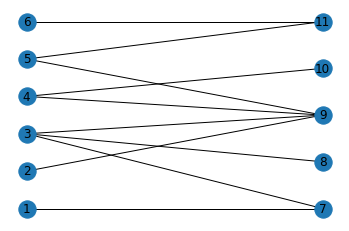

In [94]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

C = nx.Graph()

C.add_nodes_from([1, 2, 3, 4, 5, 6], bipartite=0)
C.add_nodes_from([7, 8, 9, 10, 11], bipartite=1)

C.add_edges_from([(1, 7), 
                  (2, 9), 
                  (3, 7), (3, 8), (3, 9), 
                  (4, 9), (4, 10), 
                  (5, 9), (5,11), 
                  (6,11)])

purple_nodes = {n for n, d in C.nodes(data=True) if d['bipartite']==0}
green_nodes = set(C) - purple_nodes

plt.subplot()
nx.draw(C, pos = nx.bipartite_layout(C, purple_nodes), with_labels=True)

print("Adjacency Matrix")
print(nx.to_numpy_matrix(C))
print()

print("Purple Adjacency Matrix")
purple_graph = bipartite.projected_graph(C, purple_nodes)
print(nx.to_numpy_matrix(purple_graph))
print()

print("Green Adjacency Matrix")
green_graph = bipartite.projected_graph(C, green_nodes)
print(nx.to_numpy_matrix(green_graph))
print()

print("Nodes Degree")
print(bipartite.degrees(C, purple_nodes))
print()

print("Purple Graph Average Degree")
print(nx.average_degree_connectivity(purple_graph))
print()


print("Green Graph Average Degree")
print(nx.average_degree_connectivity(green_graph))
print()





<i> Why is it a block-diagonal matrix? </i>

Because it has to represent the links from both side. So we use a block diagonal matrix to represent each 

<i> Consider a bipartite network with N1 and N2 nodes in the two sets.

What is the maximum number of links Lmax the network can have? </i>

Lmax is N1*N2

<i> How many links cannot occur compared to a non-bipartite network of size N = N1 + N2 ? </i>

In [ ]:
Every link bewtween the N1 nodes plus every link between the N2 nodes

If N1‹‹N2 , what can you say about the network density, that is the total number of links over the maximum number of links, Lmax?

In [ ]:
Find an expression connecting N1, N2 and the average degree for the two sets in the bipartite network, 〈k1〉 and 〈k2〉.

## Degree distributions

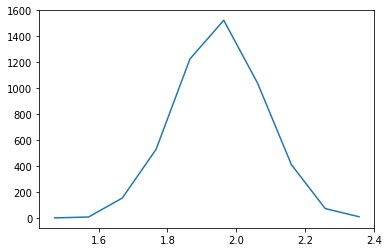

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Random data
data = np.random.normal(2, 0.125, 5000)

# returns tuples but the arrays are different sizes
data_binned = np.histogram(data, bins=10)

# Reducing the arrays to the same size
x_data = []
y_data = []

for x in range(0,10):
    x_data.append(data_binned[0][x])
    y_data.append(data_binned[1][x])
    
# Plotting
plt.plot(y_data, x_data)

In [4]:
# Generating data
data_poisson = np.random.poisson(10, 5000)

# Finding extremums
lmax = np.amax(data_poisson)
lmin = np.amin(data_poisson)

print("Max Value " + str(lmax))
print("Min Value " + str(lmin))

# Sort data
data_poisson.sort()

# Create a vector v each case contains a number

vector = range(lmin, lmax)
data_binned = np.histogram(data_poisson, bins=vector)

# Reducing the arrays to the same size
index = []
height = []

for x in range(0,lmax-1):
    index.append(data_binned[1][x])
    height.append(data_binned[0][x])

# Plot
plt.bar(index, height)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

Max Value 22
Min Value 1


IndexError: index 20 is out of bounds for axis 0 with size 20

<b> What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution. </b>

Text(0.5, 0, 'Degree')

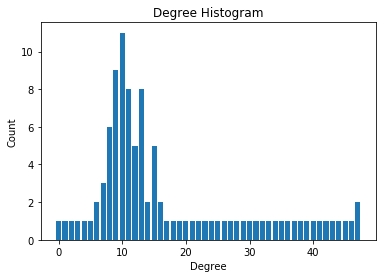

In [6]:
import matplotlib.pyplot as plt
from networkx import nx

# Average degree k = 10
# p = <k>/(N-1)

n = 50
p = 10/49

# Generating graph
G = nx.erdos_renyi_graph(n, p)
degree = G.degree()

# Finding extremums
lmax = np.amax(degree)
lmin = np.amin(degree)

vector = range(lmin, lmax)
data_binned = np.histogram(degree, bins=vector)

# Reducing the arrays to the same size
index = []
height = []

for x in range(0,lmax-1):
    index.append(data_binned[1][x])
    height.append(data_binned[0][x])

# Plot
plt.bar(index, height)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

# nx.draw(G, node_size=10)

## Random Networks

### E-R Networks

Exercice 3.1

In [82]:
n = 3000
p = 0.001

# Generating graph
G = nx.erdos_renyi_graph(n, p)

# What is the expected number of links, 〈L〉?
print(G.number_of_edges())

# In which regime is the network?
avg_deg = nx.average_degree_connectivity(G)

# Avergage degree > 1 then its a supercritical regime

# Calculate the probability pc so that the network is at the critical point
# Meaning for which value of pc is <k> = 1
# With <k> = p(N-1)
pc = 1/(n-1)
print(pc)

# Number of nodes Ncr so that the network has only one component.
# One component meaning that every node is linked
# p = <k>/N then N = <k>/p

Ncr = avg_deg[5]/p
print(Ncr)

# Network in (d), average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.
aNode = random.choice(list(G.nodes()))
otherNode = random.choice(list(G.nodes()))

4526
0.00033344448149383126
4024.516129032258


#### Calculate the degree distribution pk of this network.

Text(0.5, 0, 'Degree')

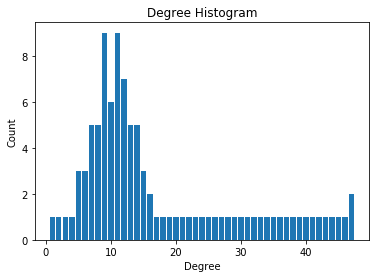

In [86]:
degree = G.degree()

# Finding extremums
lmax = np.amax(degree)
lmin = np.amin(degree)

vector = range(lmin, lmax)
data_binned = np.histogram(degree, bins=vector)

# Reducing the arrays to the same size
index = []
height = []

for x in range(1,lmax-1):
    index.append(data_binned[1][x])
    height.append(data_binned[0][x])

# Plot
plt.bar(index, height)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")